In [47]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn import metrics
from sklearn.model_selection import train_test_split

from sktime.classification.shapelet_based import MrSEQLClassifier
from sktime.datasets import load_arrow_head, load_basic_motions

from sktime.datatypes._panel._convert import from_2d_array_to_nested
from sktime.transformations.panel.rocket import Rocket
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sktime.datasets import load_arrow_head 

In [32]:
# Opening up file containing GWAS data and reading in

file = open("GWAS_Add.raw", "r")
lines = file.readlines()
len(lines)

90

In [33]:
split = lines[0]
split

'FID IID PAT MAT SEX PHENOTYPE rs6681049_1 rs4074137_1 rs7540009_0 rs1891905_1 rs9729550_1 rs3813196_1 rs6704013_0 rs307347_0 rs9439440_0 rs3128342_1 rs12044597_1 rs10907185_1 rs11260616_1 rs745910_1 rs2803291_1 rs7531342_0 rs262688_1 rs2460000_1 rs260509_1 rs2645091_1 rs2643895_1 rs2840529_2 rs3736330_2 rs4233033_1 rs942817_1 rs2236395_1 rs7550231_1 rs735000_1 rs6679232_1 rs10752737_0 rs729419_0 rs880725_1 rs2842925_1 rs1338382_1 rs10489589_1 rs2103530_1 rs1890336_1 rs2817178_1 rs881142_2 rs12124147_1 rs2455118_1 rs2455125_0 rs2500289_1 rs1108600_1 rs4648486_2 rs871822_2 rs870171_1 rs2298082_1 rs12093117_1 rs869697_1 rs4431782_0 rs4512587_0 rs12087237_1 rs3765705_1 rs3765764_1 rs1181883_1 rs2799182_2 rs2887274_1 rs2275834_1 rs2298224_1 rs6670527_2 rs4654522_1 rs7550609_1 rs6691155_1 rs4520388_1 rs7556284_1 rs10915430_1 rs10915443_1 rs4468133_1 rs6426402_2 rs12132422_1 rs2411738_1 rs12066140_0 rs351596_1 rs585160_1 rs349413_1 rs547923_1 rs1556691_1 rs619729_2 rs6656245_1 rs780569_1 rs5

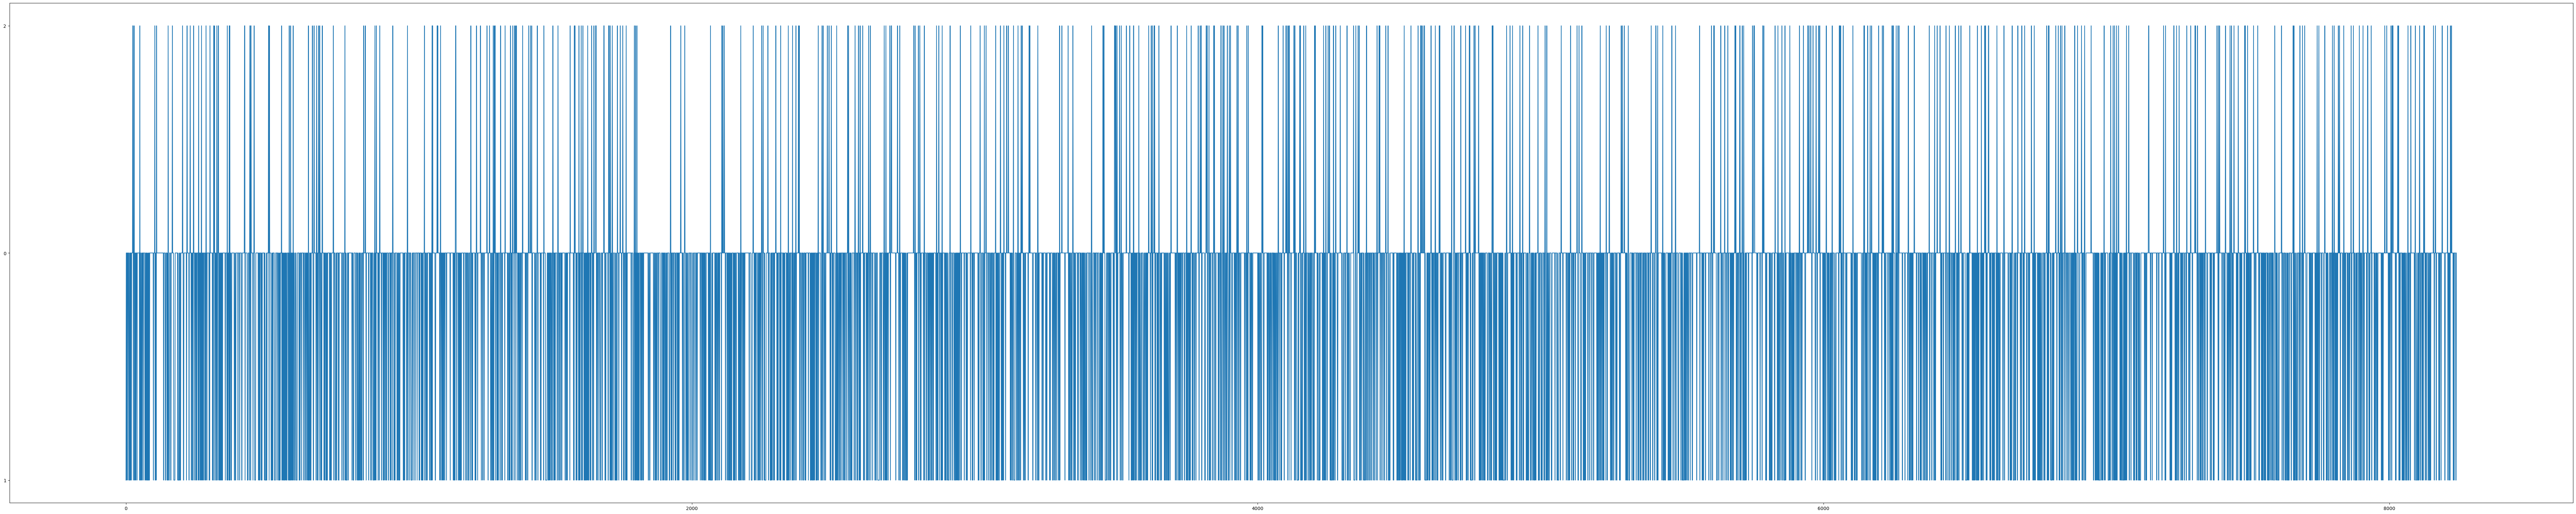

In [34]:
# Sampling and visualising a couple of individuals SNPs

split = lines[2].replace("NA", "").replace("\n", "").split()
split = split[5:]
figure(figsize=(100, 20), dpi=100)
plt.plot(split[0::10])
plt.show()

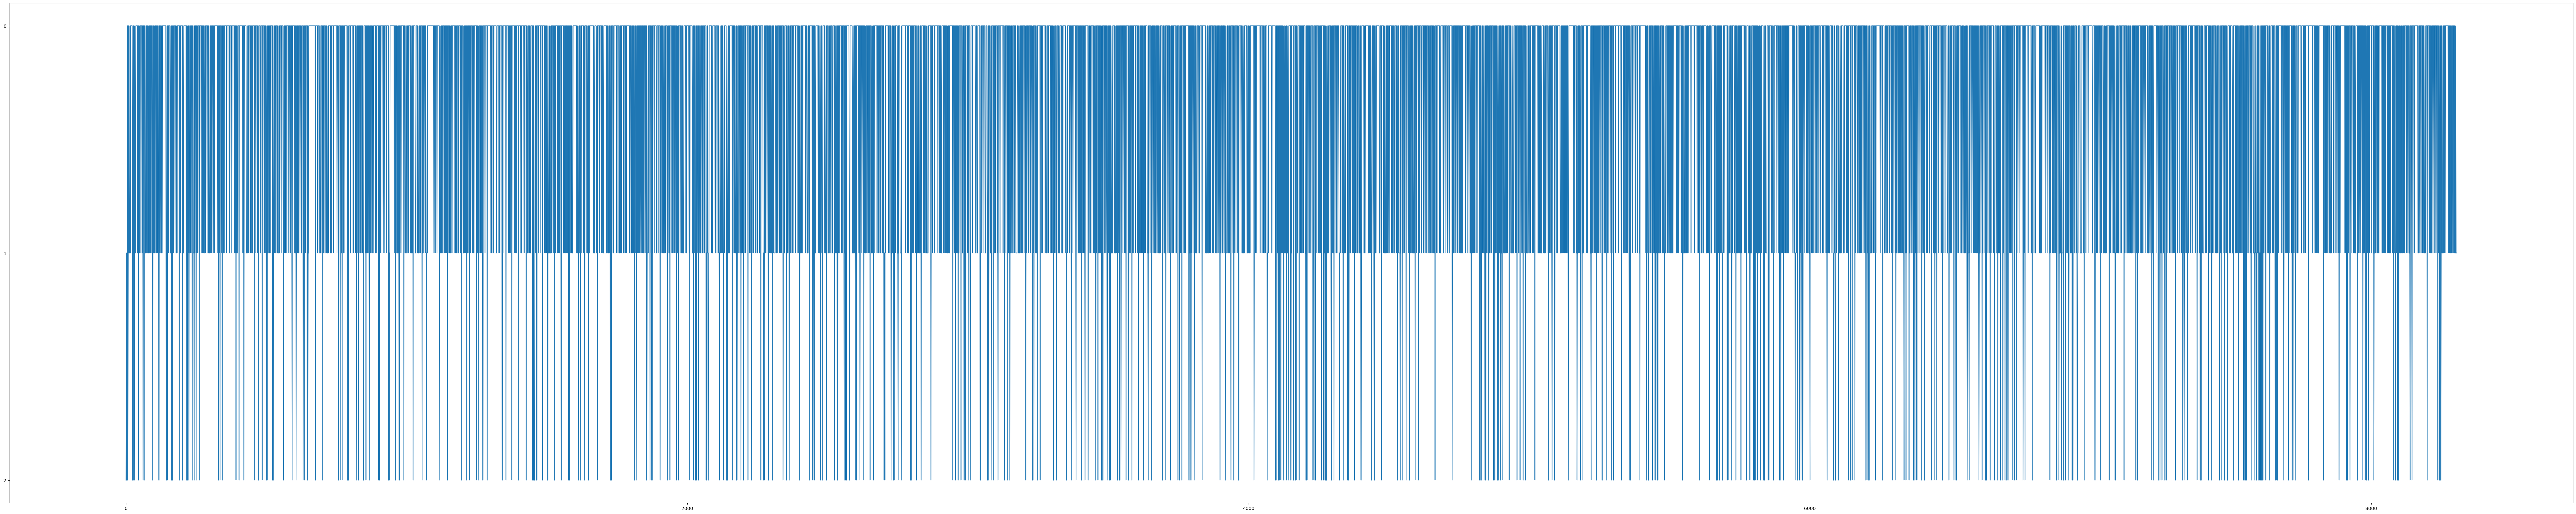

In [35]:
split = lines[3].replace("NA", "").replace("\n", "").split()
split = split[5:]
figure(figsize=(100, 20), dpi=100)
plt.plot(split[0::10])
plt.show()


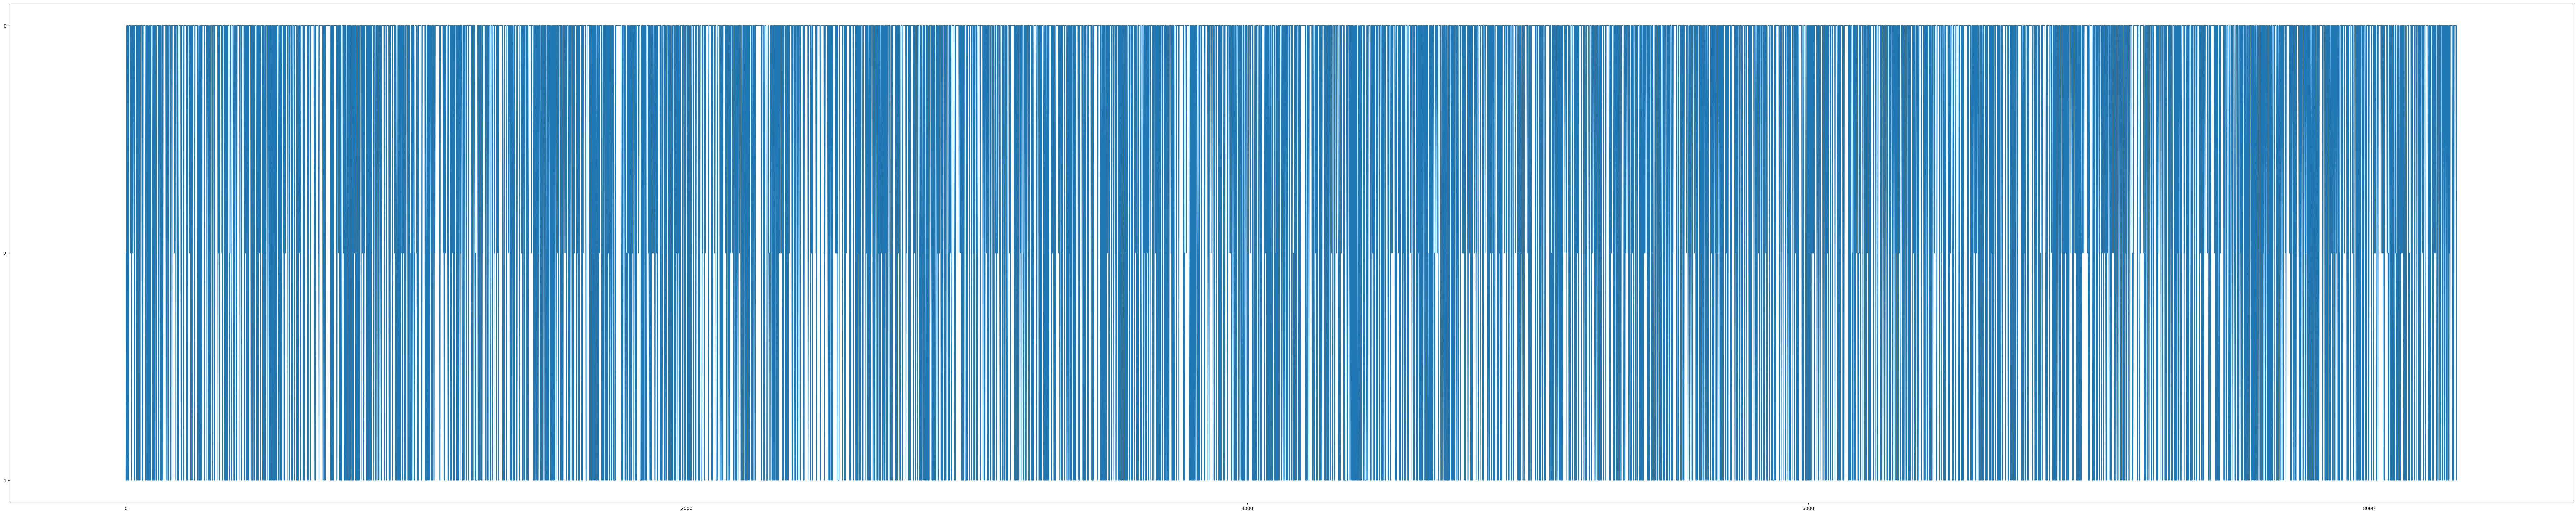

In [36]:
split = lines[4].replace("NA", "").replace("\n", "").split()
split = split[5:]
figure(figsize=(100, 20), dpi=100)
plt.plot(split[0::10])
plt.show()

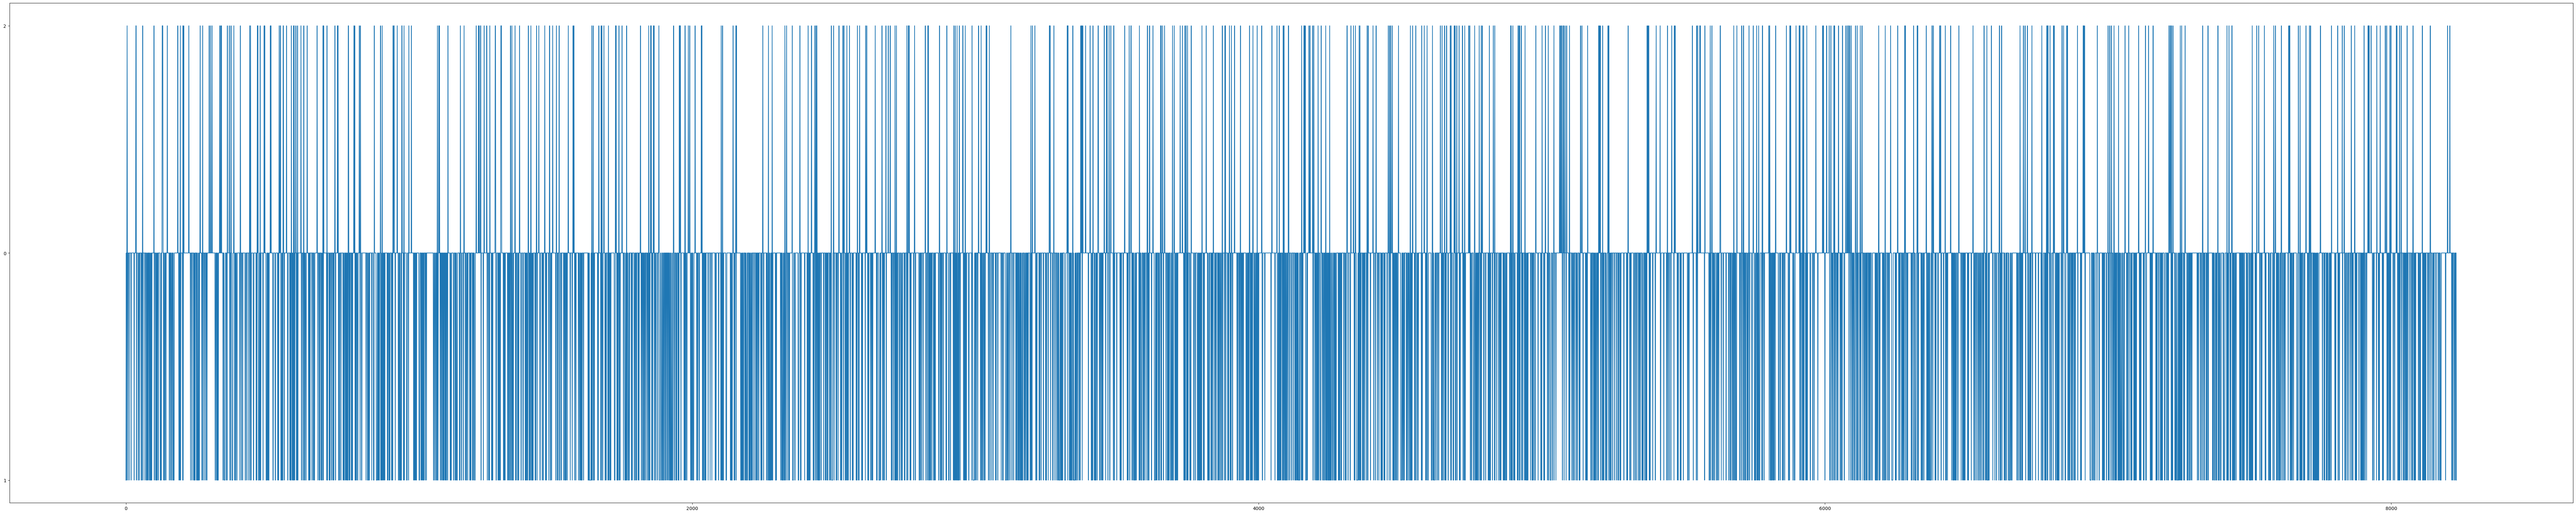

In [37]:
split = lines[6].replace("NA", "").replace("\n", "").split()
split = split[5:]
figure(figsize=(100, 20), dpi=100)
plt.plot(split[0::10])
plt.show()

In [38]:
# Loading GWAS data into DF in the correct format

columns = lines[0].strip("\n").split(" ")
columns = [n.split("_", 1)[0] for n in columns]
df = pd.DataFrame(columns=columns)

data = []
for line in lines[1:]:
    newRow = line.strip("\n").split(" ")
    data.append(newRow)

df = pd.DataFrame(data, columns=columns)


In [39]:
df.head(15)

FID IID PAT MAT SEX PHENOTYPE rs6681049 rs4074137 rs7540009 rs1891905  \
0   HCB181   1   0   0   1         1         0         0         0         1   
1   HCB182   1   0   0   1         1         0         1         0         1   
2   HCB183   1   0   0   1         2         0         1         0         1   
3   HCB184   1   0   0   1         1         0         1         0         2   
4   HCB185   1   0   0   1         1         0         1         0         0   
5   HCB186   1   0   0   1         1         0         0         0         2   
6   HCB187   1   0   0   1         1         0         0         0         1   
7   HCB188   1   0   0   1         1         0         1         0         2   
8   HCB189   1   0   0   1         1         0         0         0         0   
9   HCB190   1   0   0   1         1         0         0         0         0   
10  HCB191   1   0   0   1         2         1         0         0         1   
11  HCB192   1   0   0   1         1         0         0         0         2   
12  HCB193   1   0   0   1         1         1         0         0         0   
13  HCB194   1   0   0   1         1         0         0         0         1   
14  HCB195   1   0   0   1         1         0         0         0         0   

    ... rs131817 rs131794 rs12157953 rs5770913 rs131750 rs2269380 rs6151412  \
0   ...        0        0          0         1        1         0         0   
1   ...        2        0          0         0        2         0         0   
2   ...        1        1          0         1        1         2         0   
3   ...        0        0          0         1        1         1         0   
4   ...        2        1          0         1        1         1         0   
5   ...        1        0          0         1        1         0         0   
6   ...        0        0          0         2        0         2         0   
7   ...        0        0          0         2        0         1         0   
8   ...        1        0          0         0        2         0         0   
9   ...        1        1          0         2        0         1         0   
10  ...        0        0          0         2        0         1         0   
11  ...        2        0          0         2        0         0         0   
12  ...        1        0          0         1        1         0         0   
13  ...        0        0          0         0        2         0         0   
14  ...        2        0          0         2        0         0         0   

   rs11912064 rs1001469 rs756638  
0           0         1        0  
1           0         1        0  
2           0         0        1  
3           0         2        1  
4           0         1        0  
5           0         1        0  
6           0         2        0  
7           0         1        0  
8           0         1        1  
9           0         1        0  
10          0         1        1  
11          0         1        0  
12          0         0        0  
13          0         0        0  
14          0         0        0  

[15 rows x 83540 columns]

In [40]:
# Only selecting SNPs located on chromosome 2 

dfAlleles = df.loc[:, "rs7594567":"rs749924"]
dfInfo = df.loc[:, :"PHENOTYPE"]
df = dfInfo.join(dfAlleles)
df

FID IID PAT MAT SEX PHENOTYPE rs7594567 rs4438516 rs1870693 rs1225588  \
0   HCB181   1   0   0   1         1         0         1         0         0   
1   HCB182   1   0   0   1         1         0         2         0         0   
2   HCB183   1   0   0   1         2         0         0         0         0   
3   HCB184   1   0   0   1         1         0         0         0         0   
4   HCB185   1   0   0   1         1         0         0         0         0   
..     ...  ..  ..  ..  ..       ...       ...       ...       ...       ...   
84  JPT265   1   0   0   1         1         0         0         0         0   
85  JPT266   1   0   0   1         2         0         0         0         0   
86  JPT267   1   0   0   1         2         0         0         0         0   
87  JPT268   1   0   0   1         2         0         0         0         0   
88  JPT269   1   0   0   1         2         0         0         0         0   

    ... rs3771557 rs3771570 rs3771588 rs2279845 rs6437263 rs6757912  \
0   ...         1         1         0         0         0         0   
1   ...         1         0         0         0         0         2   
2   ...         2         0         0         0         0         0   
3   ...         1         0         1         0         0         0   
4   ...         0         0         0         0         0         1   
..  ...       ...       ...       ...       ...       ...       ...   
84  ...         0         0         0         0         0         1   
85  ...         0         1         1         1         0         0   
86  ...         0         0         1         1         0         1   
87  ...         0         0         0         0         0         2   
88  ...         0         0         2         1         0         0   

   rs12987376 rs11887982 rs13396280 rs749924  
0           0          0          0        1  
1           0          0          0        1  
2           1          0          2        2  
3           0          0          0        1  
4           0          0          2        2  
..        ...        ...        ...      ...  
84          0          0          0        0  
85          0          0          1        1  
86          0          0          0        1  
87          0          0          0        0  
88          1          0          1        1  

[89 rows x 7673 columns]

In [41]:
df.loc[df.PHENOTYPE == "2", ['rs2222162']] = 2
df.loc[df.PHENOTYPE == "1", ['rs2222162']] = 0

In [42]:
# Removing ID columns and 

phenotype = df.pop("PHENOTYPE")
dfTest = df.drop(columns=["FID","IID","PAT","MAT","SEX"])

In [43]:
# Replacing missing SNP entries and replacing with most frequent value for that SNP of other entries

imp = SimpleImputer(missing_values="NA", strategy='most_frequent')
idf = pd.DataFrame(imp.fit_transform(dfTest))

In [44]:
# Splitting data into training data and testing data

xTrain, xTtest, yTrain, yTest = train_test_split(idf, phenotype, train_size=0.6, random_state=1)

In [45]:
yTest.describe()

count     36
unique     2
top        2
freq      21
Name: PHENOTYPE, dtype: object

In [48]:
# Classifying GWAS data using decision tree and printing results

rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfc.fit(xTrain, yTrain)
yPredicted = rfc.predict(xTrain)
print("Training accuracy score: {}".format(accuracy_score(yTrain, yPredicted)))
yPredicted = rfc.predict(xTtest)
print("Testing accuracy score: {}".format(accuracy_score(yTest, yPredicted)))
print(confusion_matrix(yTest, yPredicted))

Training accuracy score: 1.0
Testing accuracy score: 0.5555555555555556
[[15  0]
 [16  5]]


In [49]:
# Classifying GWAS data using KNN and printing results

knnClf = KNeighborsClassifier() 
knnClf.fit(xTrain, yTrain)
yPredicted = knnClf.predict(xTrain)
print("Training accuracy score: {}".format(accuracy_score(yTrain, yPredicted)))
yPredicted = knnClf.predict(xTtest)
print("Testing accuracy score: {}".format(accuracy_score(yTest, yPredicted)))

Training accuracy score: 0.8301886792452831
Testing accuracy score: 0.5277777777777778


In [50]:
# Classifying GWAS data using Gaussian Naive Bayes and printing results

gnbClf = GaussianNB() 
gnbClf.fit(xTrain, yTrain)
yPredicted = gnbClf.predict(xTrain)
print("Training accuracy score: {}".format(accuracy_score(yTrain, yPredicted)))
yPredicted = gnbClf.predict(xTtest)
print("Testing accuracy score: {}".format(accuracy_score(yTest, yPredicted)))

Training accuracy score: 1.0
Testing accuracy score: 0.5833333333333334


In [51]:
# Converting df columns into 2d numpy array time series

idf = idf.apply(pd.to_numeric)
idfSeries = from_2d_array_to_nested(idf)

In [52]:
# Splitting time seriesdata into training data and testing data

xTrain, xTest, yTrain, y_test = train_test_split(idfSeries, phenotype, train_size=0.6, random_state=1)

In [53]:
# Extracting values from training split
yTrain = yTrain.values
y_test = y_test.values

xTrain = xTrain.reset_index()
xTrain = xTrain.drop(columns=['index'])

xTest = xTest.reset_index()
xTest = xTest.drop(columns=['index'])

In [54]:
# Running rocket kernal transformation on training data

rocket = Rocket()
rocket.fit(xTrain)
xTrainTransform = rocket.transform(xTrain)

In [55]:
# Classifying GWAS Data from rocket transformation using Ridge Classifier

classifier = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True)
classifier.fit(xTrainTransform, yTrain)
xTestTransform = rocket.transform(xTest)
classifier.score(xTestTransform, yTest)

0.5555555555555556

In [51]:
# Classifying GWAS data using MrSEQL
ms = MrSEQLClassifier(seql_mode="clf")
ms.fit(xTrain, yTrain)
predicted = ms.predict(xTest)
print("Accuracy with mr-seql: %2.3f" % metrics.accuracy_score(yTest, predicted))

<ipython-input-51-0aeb032226af>:2: FutureWarning: Call to deprecated class MrSEQLClassifier. (MrSEQLClassifier will be removed in v0.10.0. It will be replaced with an implementation based on Numba.) -- Deprecated since version 0.8.1.
  ms = MrSEQLClassifier(seql_mode="clf")
<ipython-input-51-0aeb032226af>:2: FutureWarning: Call to deprecated class SEQLCLF. (SEQLCLF will be removed in v0.10.0) -- Deprecated since version 0.8.1.
  ms = MrSEQLClassifier(seql_mode="clf")


Accuracy with mr-seql: 0.417
